In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [12]:
data1 = np.loadtxt(r"C:\Users\Paolo\OneDrive\Desktop\Thesis\Mycos_old_data (1)\Mycos_old_data\2014\20140415\processing_times.txt", usecols=1)
data2 = np.loadtxt(r"C:\Users\Paolo\OneDrive\Desktop\Thesis\Mycos_old_data (1)\Mycos_old_data\2014\20140415\processing_times_SAM.txt", usecols=1)

C:\Users\Paolo\AppData\Local\Temp\ipykernel_30920\1216163626.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['not_SAM', 'SAM'])


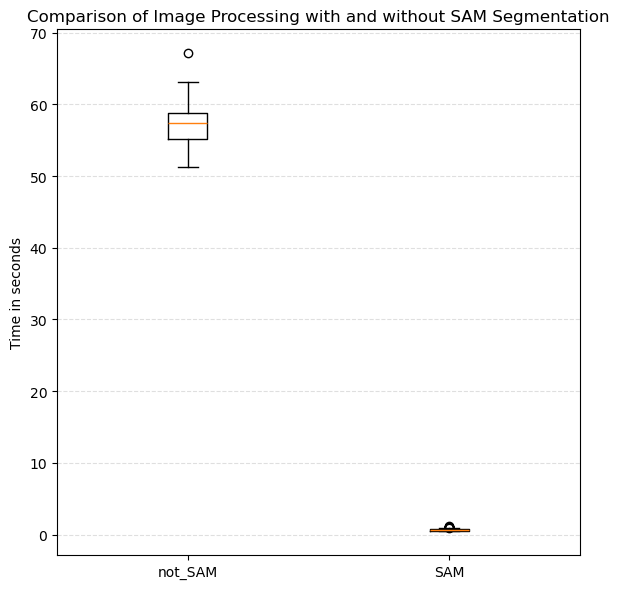

In [19]:
# Create box plot
plt.figure(figsize=(6, 6))
plt.boxplot([data1, data2], labels=['not_SAM', 'SAM'])

# Formatting
plt.ylabel("Time in seconds")
plt.title("Comparison of Image Processing with and without SAM Segmentation")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [20]:
mean1 = np.mean(data1)
mean2 = np.mean(data2)
std1 = np.std(data1, ddof=1)  # sample std (ddof=1)
std2 = np.std(data2, ddof=1)

# Independent samples t-test (Welch’s)
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

# Welch’s degrees of freedom
n1, n2 = len(data1), len(data2)
var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)
df = (var1/n1 + var2/n2)**2 / ((var1**2) / ((n1**2)*(n1-1)) + (var2**2) / ((n2**2)*(n2-1)))

# Critical t-value (two-tailed)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

# Print results
print(f"not SAM: mean = {mean1:.4f}, std = {std1:.4f}, n = {n1}")
print(f"SAM: mean = {mean2:.4f}, std = {std2:.4f}, n = {n2}")
print(f"T-statistic = {t_stat:.4f}")
print(f"P-value = {p_value:.6f}")
print(f"Degrees of freedom (Welch) = {df:.2f}")
print(f"Critical t-value (two-tailed, alpha={alpha}) = {t_critical:.4f}")

not SAM: mean = 57.0747, std = 2.4126, n = 268
SAM: mean = 0.6619, std = 0.1315, n = 268
T-statistic = 382.2273
P-value = 0.000000
Degrees of freedom (Welch) = 268.59
Critical t-value (two-tailed, alpha=0.05) = 1.9688
